<a href="https://colab.research.google.com/github/Makarand111/CERTIFICATION/blob/main/Customer_Churn_for_a_Telecom_Company.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting Customer Churn for a Telecom Company**




# **Objective:**

## The objective is to predict customer churn for a telecom company using machine learning, enabling proactive measures to retain customers, enhance satisfaction, and optimize business strategies.

# **Import Data:**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [ ]:
url = "https://github.com/Makarand111/Customer-Churn-for-a-Telecom-Company/raw/main/TelecomCustomerChurn.csv"
data = pd.read_csv(url)
data.head()

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Monthly,Yes,Manual,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Manual,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Monthly,Yes,Manual,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Monthly,Yes,Manual,70.70,151.65,Yes


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
data.describe()

,SeniorCitizen,Tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
data.columns

Index(['customerID', 'Gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'Tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
data.shape

(7043, 21)

# **Data Preprocessing:**

## Handling Missing Data:
Check for missing values in the dataset and handle them appropriately ( either by imputing ar dropping)

In [ ]:
data.isnull().sum()
# Select only numeric columns for median calculation
numeric_data = data.select_dtypes(include=np.number)

# Calculate the median for numeric columns only
median_values = numeric_data.median()

# Fill NaN values in the original DataFrame using the calculated medians
data.fillna(median_values, inplace=True)

## Encoding Categorical Variables:
Convert the Categorical Columns into numerical form using techniques like One-hot Encoding or Label Encoding

In [ ]:
data=pd.get_dummies(data,drop_first=True)

## Feature Engineering:
Standardize or normalize the data for features that are on different scales.

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()
data[['Tenure']] = scaler.fit_transform(data[['Tenure']])

# **Define Target (y) & Feature (x):**

In [ ]:
x=data.drop('Churn_Yes',axis=1)
y=data['Churn_Yes']

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x

,SeniorCitizen,Tenure,MonthlyCharges,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,customerID_0013-SMEOE,customerID_0014-BMAQU,...,TotalCharges_995.35,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9
0,0,-1.277445,29.85,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0,0.066327,56.95,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0,-1.236724,53.85,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0,0.514251,42.30,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0,-1.236724,70.70,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,-0.340876,84.80,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7039,0,1.613701,103.20,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7040,0,-0.870241,29.60,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7041,1,-1.155283,74.40,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
y

,Churn_Yes
0,False
1,False
2,True
3,False
4,True
...,...
7038,False
7039,False
7040,False
7041,True


In [ ]:
x_train.shape

(5634, 13593)

In [ ]:
x_test.shape

(1409, 13593)

In [ ]:
y_train.shape

(5634,)

In [ ]:
y_test.shape

(1409,)

# **Modeling: Model Selction**

In [ ]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression(max_iter=1000)

In [ ]:
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

# **Prediction:**

In [ ]:
y_pred = model.predict(x_test)
y_pred
y_pred_prob = model.predict_proba(x_test)
y_pred_prob

array([[0.28723599, 0.71276401],
       [0.92717638, 0.07282362],
       [0.99182862, 0.00817138],
       ...,
       [0.96170281, 0.03829719],
       [0.97973339, 0.02026661],
       [0.52325627, 0.47674373]])

# **Evaluation:**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
accuracy = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
cm = confusion_matrix(y_test,y_pred)
print("Acuracy: ",accuracy)
print("Precision: ",precision)
print("Recall: ",recall)
print("F1_score: ",f1)
print("Confusion_Matrix: ",cm)

Acuracy:  0.8211497515968772
Precision:  0.6896551724137931
Recall:  0.5898123324396782
F1_score:  0.6358381502890174
Confusion_Matrix:  [[937  99]
 [153 220]]


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

### Confusion Matrix
### Displays the breakdown of true positives, true negatives, false positives, and false negatives in the prediction results.

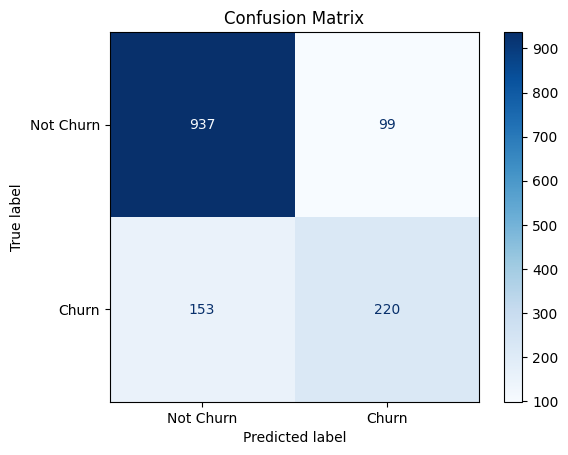

In [ ]:
def plot_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Churn", "Churn"])
    disp.plot(cmap="Blues")
    plt.title("Confusion Matrix")
    plt.show()
plot_confusion_matrix(y_test, y_pred)

###ROC (Receiver Operating Characteristic) Curve
###Shows the trade-off between the True Positive Rate (TPR) and False Positive Rate (FPR), with the AUC score (Area Under the Curve) summarizing the model’s ability to distinguish between classes.

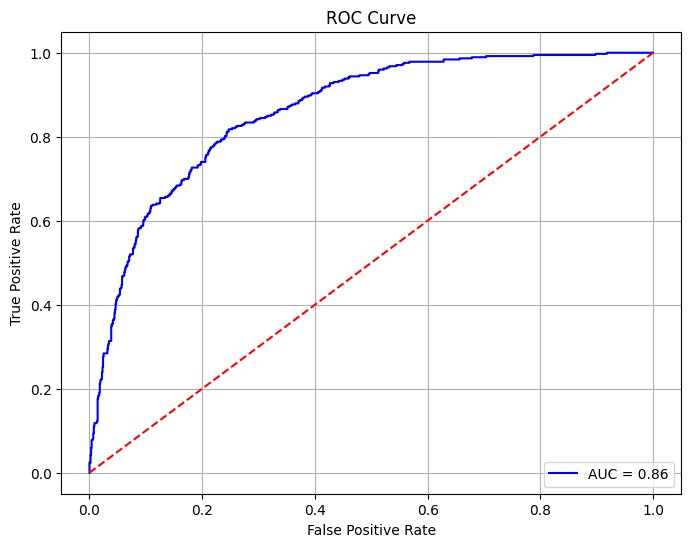

In [ ]:
def plot_roc_curve(y_test, y_pred_prob):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:, 1])  # Probability for positive class
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color="blue", label=f"AUC = {roc_auc:.2f}")
    plt.plot([0, 1], [0, 1], color="red", linestyle="--")
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()
plot_roc_curve(y_test, y_pred_prob)

# **Conclusion & Accuracy Score:**

## The model achieved an accuracy of 82.18%, indicating it correctly predicts churn for the majority of customers. This suggests the model is effective in identifying overall patterns in the data.

# **Key features:**

### 1. Customers with shorter tenures are more likely to churn, as they may not have established loyalty to the company.  
### 2. Higher monthly charges can lead to dissatisfaction, increasing the likelihood of churn.  
### 3. Customers with month-to-month contracts are more prone to churn compared to those with longer-term contracts.  
### 4. Frequent outages, unresolved complaints, or dissatisfaction with add-on services (e.g., internet or streaming) significantly impact churn.  
### 5. Demographics such as age and location influence churn based on the company’s service reach and market competition.  
### 6. The model can guide targeted retention campaigns focusing on high-risk customers with low tenure and high charges.  
### 7. Decent precision helps avoid unnecessary expenditure on retaining low-risk customers.  
### 8. Real-time churn prediction can enable quicker responses, improving customer satisfaction and retention.  